## Compare H atom functions:  
Select up to 4 different plots to superimpose
Choose from n = 1 to n = 5, s, p, d, f either $R_{nl}$ or $R_{nl}^2$ or $P_{nl}$

The default function is $P_{1s}$ 

In [15]:
%matplotlib notebook
from pylab import *
from scipy.special.orthogonal import genlaguerre
from scipy.special import factorial
import ipywidgets as widgets
from matplotlib import pyplot as plt
plt.style.use('default')

In [16]:
def N(n,l):
	return sqrt((2.0/n)**3 * factorial(n-l-1) / (2*n*(factorial(n+l))))
#note:  Normalization is different by factor of 1.0 / factorial(n+l) relative
#to PCHem text due to difference between "L n+l 2l+1" notation and
# "L n (a)" notation.  See e.g. Chap. 12 of Rainville "Special Functions"
# and compare expansion (3) (for n = n'-l-1) to the similar expansion
# (20-9) in Pauling and Wilson

def Rnl(x, n, l):
	rho = 2.0*x/n
	f = genlaguerre(n-l-1,2*l+1)
	return N(n,l)*exp(-0.5*rho)*rho**l*f(rho)

def Pnl(r, n, l):
        return (r * Rnl(r, n, l))**2

def R_sq(x, n, l):
        return Rnl(x, n, l)**2
    
functions = {'Rnl': Rnl, 'Pnl': Pnl, 'Rnl^2': R_sq}
l_codes = 'spdfg'
Pnl.name = r'$P_{%d%s}$'
Rnl.name = r'$R_{%d%s}$'
R_sq.name = r'$R_{%d%s}^2$'

In [17]:
def gen_plot(f, n, str_l, r, ls = '-'):
    try:
        label = f.name % (n, str_l)
    except AttributeError:
        print('fail!')
        label = ""
    l = l_codes.index(str_l)
    ax = fig.gca()
    plt.plot(r, f(r, n, l), ls = ls, label = label)  
    

<IPython.core.display.Javascript object>


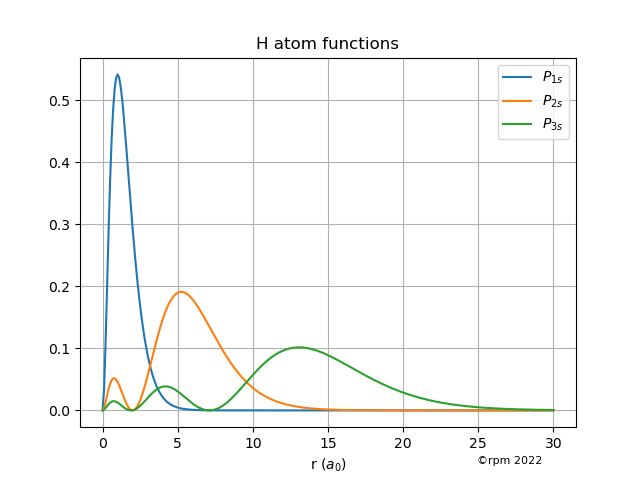

In [19]:
function_types = ['Pnl', 'Rnl^2', 'Rnl' ]
n_values = [1, 2, 3, 4, 5]
fig = plt.figure("H atom functions")
#r = linspace(0, 30, 300)

layout_hidden = widgets.Layout(visibility = "hidden")
layout_visible = widgets.Layout(visibility = "visible")
drop_layout = widgets.Layout(width = '150px')
style_layout = widgets.Layout(width = "200px")


# build selectors with a loop:
# control lists:
types = []
shells = []
subshells = []
boxes = []
styles = []

n_functions = 4
num_plots = widgets.Dropdown(options = range(1, n_functions+1), value = 1, description = "", layout = drop_layout)
range_choice = widgets.FloatText(value = 30.0, step = 5, description = "Range", layout = drop_layout)
check_grid = widgets.Checkbox(value = False, description = "show grid")

for i in range(n_functions):
    types.append(widgets.Dropdown(options = function_types, description = "type", layout = drop_layout))
    shells.append(widgets.Dropdown(options = n_values, description = "shell", layout = drop_layout))
    subshells.append(widgets.Dropdown(options = 's', description = "subshell", layout = drop_layout))
    styles.append(widgets.Dropdown(options = ['solid', 'dashed', 'dashdot', 'dotted'], 
                                   description = 'style', layout = style_layout))
    boxes.append(widgets.HBox([types[i], shells[i], subshells[i], styles[i]]))
                           
plot_widgets = [num_plots, range_choice, check_grid] + types + shells + subshells + styles
for box in boxes[1:]:
    box.layout = layout_hidden

def update_plot(change):
    r = linspace(0, range_choice.value, 300)
    N = num_plots.value 
    ax = fig.gca()
    ax.cla()
               
    # update options for subshell selection:
    called_by = change['owner']
    desc = called_by.description
    if desc == 'shell':
        n = called_by.value
        i = shells.index(called_by)
        subshells[i].options = l_codes[:n]
        
    for i in range(N):
        f_type = types[i].value
        f = functions[f_type]
        n = shells[i].value
        l = subshells[i].value
        line = styles[i].value
        gen_plot(f, n, l, r, ls = line)
        
    
    if check_grid.value:
        plt.grid()
    
    legend();
    title("H atom functions")
    xlabel("r ($a_0$)")
    text(0.8,-0.1,u"\u00A9"+"rpm 2022", transform=ax.transAxes,
                                fontsize = 8,)
    
def update_boxes(change):
    n = num_plots.value - 1
    for i, box in enumerate(boxes):
        box.layout = layout_visible if i <= n else layout_hidden
        
for w in plot_widgets:
    w.observe(update_plot, names = 'value')
    
def on_button_clicked(b):
    savefig("comparison.pdf")
    
print_button = widgets.Button(description = "Save Figure", button_style = 'success')
print_button.on_click(on_button_clicked)
num_plots.observe(update_boxes, names = 'value')
number_box = widgets.HBox([widgets.Label(value = "Number of functions to plot: "), num_plots, range_choice, check_grid])
Vlayout = widgets.VBox([number_box]+boxes+[print_button])
gen_plot(Pnl, 1, 's', linspace(0, 30, 300))
display(Vlayout)

In [20]:
%%html
<style>
div.input{
    display:none;
}
</style>